<a href="https://colab.research.google.com/github/aminsamir45/MIT-9.40-Neural-Computation/blob/main/PSET%201/pset1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAME: Samir Amin
#gmail: aminsam@mit.edu



---



#**9.40 - PSET 1**



---


---




Note: Using this template is OPTIONAL. You can start from scratch if that works better for you! However, your code must be well documented so it is easy to read. This applies to all PSETs.

#**Learning objectives and outcomes:**

The problems sets are designed to learn basic aspects of neural computation, where the emphasis is on articulating these models and analyses into working Python code.  These problems are the perfect place to assimilate and build upon what you have learned in lecture and recitation.

To achieve these goals, problems will combine: building numerical simulations of neuronal models and processes, analyses and visualization of data coming from either experimental data or as output of simulations, and a bit of analytical and conceptual work.

More specifically, PSET 1 covers the material presented in lectures 1-3 and recitations 1&2. The problems will touch on diffusion in 1D, equivalent circuit model and Nernst potential.

The expected learning outcomes for this PSET are:

*   Be acquainted and be comfortable using Python for scientific computing.
*   Be able to load raw data files
*   Be able to produce simple plots, and data visualizations.
*   Be able to extract relevant parts of a numerical array.
*   Be able to initialize variables and vectors.
*   Be able to compute the mean and variance of an array, both row and column wise.
*   Be able to implement for-loops for basic numerical integration of differential ordinary equations.

*   Be able to write basic functions.
*   Be able to present your results as a cohesive and structured report.


















In [ ]:
# First import libraries needed to solve the problem
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
import math

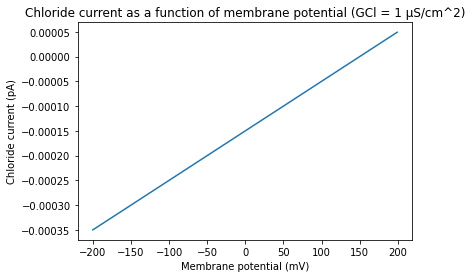

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
ECl = 150  # Chloride reversal potential (mV)
GCl = 1e-6  # Chloride conductance (S/cm^2)

# Define membrane potential range
V = np.arange(-200, 200, 1)

# Calculate chloride current as a function of membrane potential
ICl = GCl * (V - ECl)

# Plot chloride current as a function of membrane potential
plt.plot(V, ICl)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Chloride current (pA)')
plt.title('Chloride current as a function of membrane potential (GCl = 1 µS/cm^2)')
plt.show()

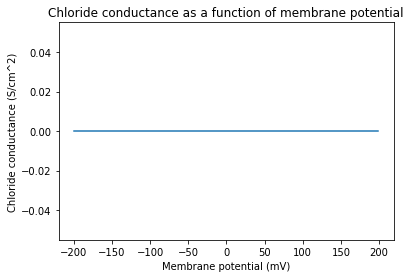

In [ ]:
def alpha(V):
    alpha_V = np.zeros_like(V)
    alpha_V[V >= 0] = 1 / (1 + np.exp(-0.1 * (V[V >= 0] - 10)))
    return alpha_V

# Plot the conductance of the chloride channel as a function of voltage
GCl = alpha(V)

plt.plot(V, GCl)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Chloride conductance (S/cm^2)')
plt.title('Chloride conductance as a function of membrane potential')
plt.show()

I = -alpha(V) * (V - ECl)

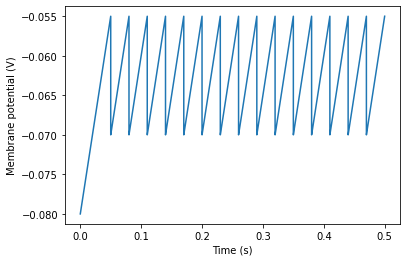

In [ ]:
#5.1 
import numpy as np
import matplotlib.pyplot as plt

# Define constants
Cm = 200e-12  # membrane capacitance (F)
I_inj = 0.1e-9  # injected current (A)
Vm_reset = -70e-3  # reset potential (V)
Vm_thresh = -55e-3  # spike threshold (V)
Vm_rest = -80e-3  # resting potential (V)
dt = 0.01e-3  # time step (s)

# Initialize variables
t = np.arange(0, 0.5, dt)
Vm = np.zeros_like(t)
Vm[0] = Vm_rest

# Integrate membrane potential
for i in range(1, len(t)):
    Vm[i] = Vm[i-1] + dt/Cm * I_inj
    if Vm[i] >= Vm_thresh:
        Vm[i] = Vm_reset

# Plot membrane potential
plt.plot(t, Vm)
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.show()



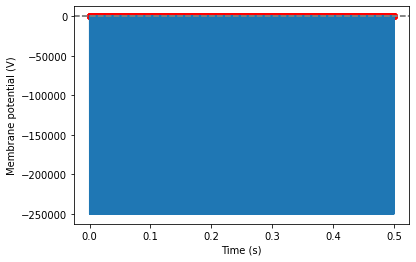

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
C = 200e-12      # membrane capacitance (F)
V_reset = -70e-3 # reset potential (V)
V_thresh = -55e-3 # spike threshold (V)
I_inj = 0.1e-9   # injected current (A)
V_init = -80e-3  # initial membrane potential (V)
dt = 0.1e-3      # time step (s)
t_end = 0.5      # end time (s)

# Define time array
t = np.arange(0, t_end, dt)

# Initialize membrane potential array
Vm = np.zeros_like(t)
Vm[0] = V_init

# Simulate neuron using Euler method
for i in range(1, len(t)):
    dVm = (-1/C) * (Vm[i-1] - V_reset) + (I_inj/C) * dt
    Vm[i] = Vm[i-1] + dVm
    if Vm[i] >= V_thresh:
        Vm[i] = V_reset

        # Optional: add spike to plot
        plt.plot(t[i], V_reset, 'ro')

# Plot membrane potential as a function of time
plt.plot(t, Vm)
plt.axhline(y=V_reset, linestyle='--', color='gray')
plt.axhline(y=V_thresh, linestyle='--', color='gray')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.show()

Next, mount your google drive. This is where you will be saving your files which you can access from anywhere.
Colab will add a new folder "Colab Notebook" to your google drive. This can be accessed from "drive/MyDrive/" on the left as you click on the folder picture. We suggest you always use this Colab Notebook folder as your working folder where you store your files and data files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Problem 1: 1D DIFFUSION**
Diffusion in 1D can be seen as a random walk. A random walk is the process by which randomly-moving objects wander away from where they started. The simplest random walk to understand is a 1-dimensional walk. Suppose that a particle is sitting at the center of a integer number line. Let’s call this position, x = 0. Then, at each time point the particle takes a step of length 1 either to the left or to the right, with equal probability (1/2 in each direction). During the diffusion process, the particle keeps taking steps either left or right each time independently of what has happened at previous time points.
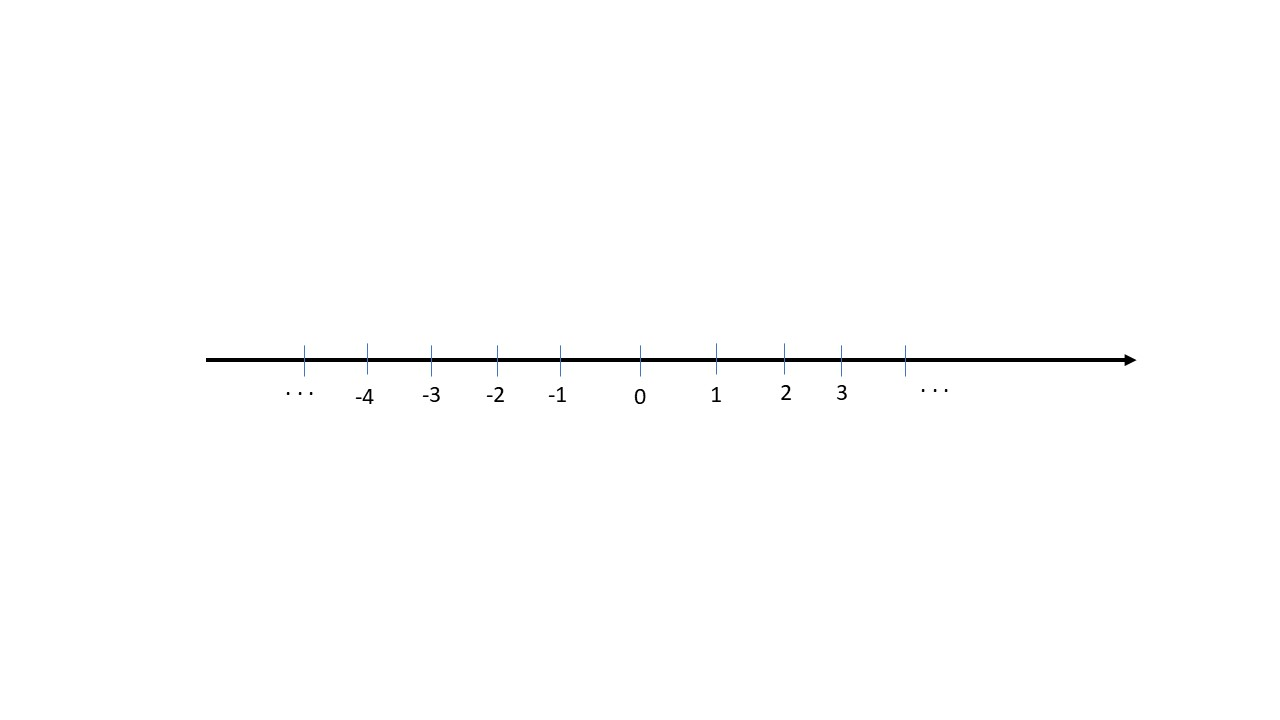

The file randomwalk.mat contains a matrix X that summarizes a random walk experiment for multiple particles.
 
The matrix X contains 500 rows and 1001 columns. In this matrix, each row represents the position of a given particle over time. These positions are in units of microns (1 micron = $10^{-6}$ m). Conversely, each column represents a time point in our experiment. Thus, the first column is the position of all particles at t = 0. We have tracked the particles positions in time increments of 1 millisecond. So, column 2 are the positions of all particles a t = 1 msec, column 3 at t = 2 msec and so on. 


In [ ]:
# load the data file from your google drive. So you'll need to change the path to yours ...
data=loadmat('/content/drive/MyDrive/Colab Notebooks/9.40/PSET 1/randomwalk.mat')

FileNotFoundError: ignored

##Q1.1
	Look at matrix X and determine the initial position for all particles.

In [ ]:
# INSTRUCTIONS FOR ALL QUESTIONS:
# DO NOT DELETE ANYTHING, JUST ADD YOUR CODE!

X = data['X']   # variable of interest in file
# your code goes here
out = []
for i in X:
  out.append(i[0])
print(out)

# print the result (here)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

NameError: ignored

##Q1.2
	
What is the value of time $time\_interval$ for the last column of matrix X? 

Give your answer in milliseconds (ms).

In [ ]:
numCols = X[0].size     # size of first row
numRows = X[:,0].size

# YOUR CODE GOES HERE:
time_interval = numCols -1
print(time_interval)

# PRINT YOUR ANSWER
1000 # in milliseconds

1000


1000

##Q1.3
	Plot the trajectory of particle 14 as a function of time.

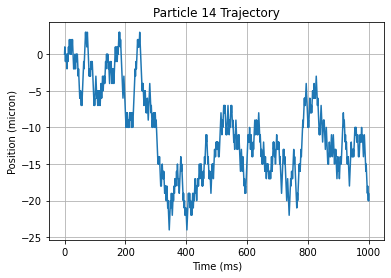

In [ ]:
# RECALL, IN PYTHON, INDICES IN ARRAYS START AT 0.

# name the array that stores the position of particle 14: x_p14

# add your code here
X = data['X'] 
t = np.arange(0, X.shape[1]) # specify time steps from 0 to 499
x_p14 = X[13]





# commands for plotting position, x_p14, vs time, t
# plot the trajectory of particle 14
fig1, ax1 = plt.subplots()
ax1.plot(t, x_p14)
ax1.set(xlabel='Time (ms)', ylabel='Position (micron)', title='Particle 14 Trajectory')
ax1.grid()

plt.show()

## Q1.4
In a single figure panel, plot the trajectory of all particles as a function of time.

a. What do you observe?

b. Why each particle follows a different trajectory?

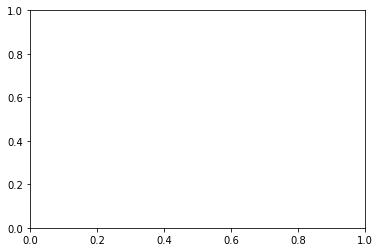

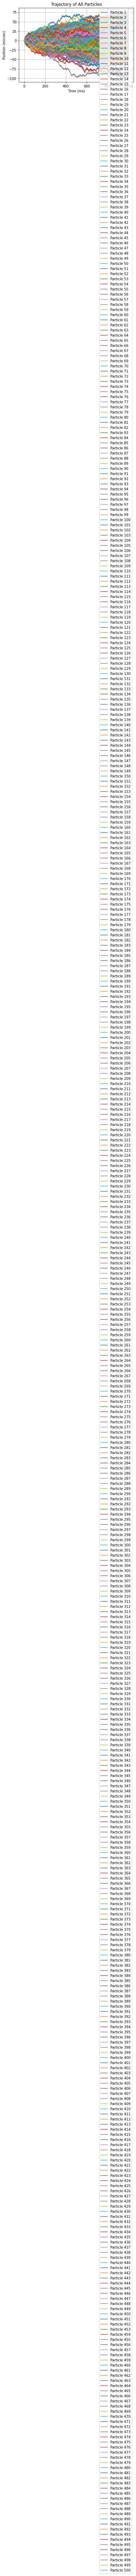

In [ ]:
# fig2, ax2 = plt.subplots()

# add your code here. Use a for loop over particles
t = np.arange(0, X.shape[1]) 


# plot the trajectory of all particles
fig1, ax1 = plt.subplots()
for i in range(X.shape[0]): # loop over all particles
    ax1.plot(t, X[i], label=f'Particle {i+1}')
ax1.set(xlabel='Time (ms)', ylabel='Position (micron)', title='Trajectory of All Particles')
ax1.legend()
ax1.grid()

plt.show()


Answer questions here:

a. All the particles start in the same centralized locations and have different trajectories. For example, some are linear, some are oscilating, some interact with other particles, etc.



b. Each particle has its own trajectory because it is interacting within an environment of other particles. There are many factors that influence it's position including velocity, direction, gravity, other particles, etc.



##Q1.5 
Plot the average position of the particles as a function of time. 

Interpret the plot and briefly discuss the result.
         

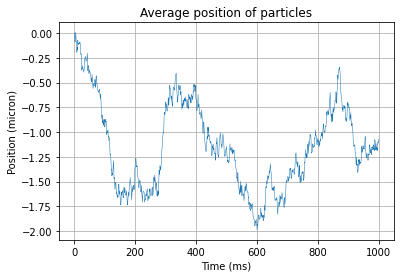

In [ ]:
# Use mean attribute for a matrix, name it mean_x 

# add your code here

t = np.arange(0, X.shape[1])


mean_x = np.mean(X, axis=0)

# plotting mean-x vs time, t

fig3, ax3 = plt.subplots()

ax3.plot(t,mean_x, linewidth = 0.5)
ax3.set(xlabel='Time (ms)', ylabel='Position (micron)', 
        title ='Average position of particles')
ax3.grid()
plt.show()

Answer: The plot shows the average position of all the particles as a result of time. Towards the beginning of the simulation, the average position is fairly close to the original position but as time passes, the average position deviates by quite some bit. This is a result of the factors mentioned previously in parts 1.4 and 1.3. Overall, the positions change randomly.

...

##Q1.6
 Plot the mean square displacement of the ensemble of particles as a function of 
      time. 

      a. Is there any trend in this plot? 
      
      b. Interpret the trend

Hint: at each point in time, calculate 
$$
\frac{1}{N} \sum_{i=1}^N x_i(t)^2
$$

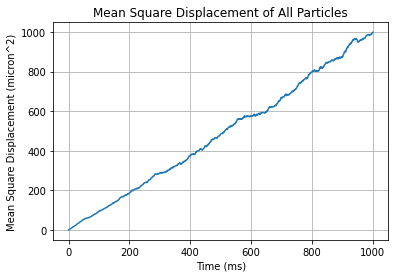

In [ ]:
# add your code to plot here. 
N = X.shape[0]
t = np.arange(0, X.shape[1])

# calculate the mean square displacement
msd = np.zeros(t.shape)
for i in range(1, len(t)):
    for j in range(N):
        msd[i] += (X[j,i] - X[j,0])**2
    msd[i] /= N

# plot the mean square displacement
fig1, ax1 = plt.subplots()
ax1.plot(t, msd)
ax1.set(xlabel='Time (ms)', ylabel='Mean Square Displacement (micron^2)', title='Mean Square Displacement of All Particles')
ax1.grid()

plt.show()


Answers:

a. The trend in this data is a linear increase in the mean square displacement over time. 



b. The reason for this trend is because the particles undergo random motion which is charecteristic of diffusion. The particles are evenly spreading out over time according to a particular coefficient - 1 micron^2 per 1 ms 



##Q1.7
 a. Use the plot in question 6 to estimate the diffusion coefficient 
of these particles. 
    
 b. Briefly explain the methodology implemented to  estimate this quantity.

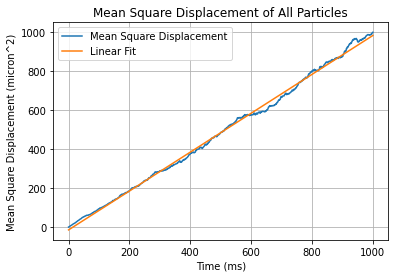

Diffusion coefficient:  0.24919010263987507


In [ ]:
# a. Add your code here. You may use a linear regression provided in stats library
N = X.shape[0]
t = np.arange(0, X.shape[1])

# calculate the mean square displacement
msd = np.zeros(t.shape)
for i in range(1, len(t)):
    for j in range(N):
        msd[i] += (X[j,i] - X[j,0])**2
    msd[i] /= N

# perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(t, msd)
D = slope/4.0

# plot the mean square displacement and the fitted line
fig1, ax1 = plt.subplots()
ax1.plot(t, msd, label='Mean Square Displacement')
ax1.plot(t, slope*t+intercept, label='Linear Fit')
ax1.set(xlabel='Time (ms)', ylabel='Mean Square Displacement (micron^2)', title='Mean Square Displacement of All Particles')
ax1.grid()
ax1.legend()

plt.show()

print("Diffusion coefficient: ", D)


Answer; slope - D = slope/4,0

b. The methodology used involves fitting a line to the mean square distance graph created in problem 1.6 using linear regression. The line represents the diffusion coefficient, representing the particles spreading out evenly/linearly over time. The random motion contributes to this occurrence where the formula msd = 4Dt represents the diffusion coefficient over time.


 

# **Problem 2: Equivalent Circuit Model**

The equivalent circuit model of a neuron that we built in class is essentially a simple RC circuit with the addition of battery to capture the non-zero membrane resting potential. The lipids on the cell membrane provides electrical insulation between the intracellular fluid and the extracellular fluid. This creates a capacitor, with capacitance proportional to the cell’s surface area (A). The cell membrane is not a perfect insulator. Pores in the membrane allow ions to move across it.  A cell’s total membrane conductance (Gm) represents how easily ions flow across the membrane.  Note that the total conductance is also proportional to the cell’s area and recall that conductance is the reciprocal of resistance.

For simplicity let’s assume that our modeled neuron is a perfect sphere of radius 0.06 mm and resting membrane potential Vrest = -70 mV. The membrane of this neuron has a specific membrane capacitance (cm) of 10 nF/mm2 and specific membrane conductance (gm) of 1  .

This modeled neuron obeys the following differential equation:
\begin{equation}
V(t) + \tau_m \frac{dV(t)}{dt} = V_{rest} + R_m I_e \tag{2.1}
\end{equation}
 where V(t) is the membrane potential at time t, Vrest is the resting membrane potential, Rm is the membrane resistance, Cm is the membrane capacitance, Ie is the current injected, and   is the membrane time constant.

The objective of this exercise is to understand how this cell responds to injected current. To achieve this objective, we need to solve equation 2.1 to find V(t) for a given current waveform. We can do this either analytically or numerically.  Luckily, the above differential equation has analytical solution for constant applied current:
\begin{eqnarray}
V(t) &= & V_{rest} + R_m I_e  \nonumber \\
& & \,\,\,\,\,\,\,  + \left(V_0 - V_{rest} - R_m I_e\right)\exp \left( -\frac{t-t_0}{\tau_m} \right) \tag{2.2}
\end{eqnarray}
where $t_0$ is a reference time when the initial condition is set to $V_0$. 

This equation constitutes the core a numerical integration method to solve first order linear ordinary differential equations known as the exponential Euler scheme. This scheme is further discussed in the accompanying document NumericalIntegration.pdf. 
By implementing this numerical scheme in Python, we will be able to simulate the response of our modeled neuron to square pulses of injected current and answer the following questions: 


In [ ]:
# delete all previous variables from memory

%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
!pip install numericalunits
# this is needed for units if you would like to use it

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
import math

# you may use the following package for units, if you wish.
from numericalunits import mL, nm, ms, um, s, mV, mm, nF

## Q2.1
Draw the equivalent circuit model for this neuron, labeling 
      intracellular space, extracellular space, membrane capacitance, and 
      membrane resistance.

In [ ]:
gm = 1   # uS/mm2
cm = 10   # nF/mm2
r = 0.06  # mm
Vrest = - 70   #  mV

Area = 4*np.pi*(r**2)  # mm2



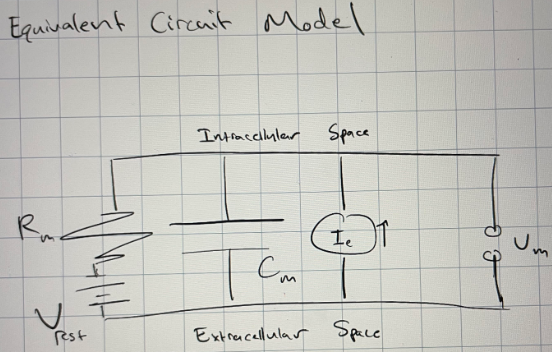Attach your picture of the circuit here!

....




...

## Q2.2
Calculate the total membrane conductance Gm and the total membrane
resistance Rm for this modeled neuron.

In [ ]:
# Add your code here and print the answers
Gm = Area *gm
Rm = 1/Gm

# be sure to state correct units!!!!
print('Total conductance {:.2e} micro Siemens'.format(Gm))  # format for scientific notation
print('Total resistance {:.2e} mega ohms'.format(Rm))

Total conductance 4.52e-02 micro Siemens
Total resistance 2.21e+01 mega ohms


## Q2.3
Calculate the total membrane capacitance Cm for this modeled neuron.

Answer must be in **nanoFarad**. 4.12*10-4

In [ ]:
# add your code here for Cm

Cm = cm*Area 


print('Total capacitance {:.2e} nF'.format(Cm)  )

Total capacitance 4.52e-01 nF


## Q2.4
What is the analytical value of the time constant for this modeled 
      neuron?

Answer must be in $ms$. 


In [ ]:
# add your code here for time constant, tau

tau = Cm * Rm

print('Time constant {:2e} ms'.format(tau))

Time constant 1.000000e+01 ms


## Q2.5
Implement the exponential Euler scheme with $V_0= V_{rest}$, time step $dt=0.01 \, ms$.

Make sure that:

a.	You set the cell’s capacitance, resistance, and resting potential (using the values calculated and defined above).

b.	 You set the initial condition V0 (i.e. V(t=0)) to V0 = Vrest and the current injected Ie to 100 pA starting at 100ms and finishing at 200 ms. 

c.	Your code updates V(t) at every time step using the exponential Euler method.


    injected current, Ie = 100pA starting at 100 ms 
    and ending at 200ms

See the Colab on "**Numerical integration of ordinary differential equations**" for more details on the exponential Euler method.

In [ ]:
# Integration parameters
dt = 0.01    #integration timestep in ms
t_dur = 1000  #simulation total time in ms
V0 = Vrest       # initial condition in mV
k = math.ceil(t_dur/dt)  # total number of iterations
V = np.zeros(k+1)  # voltage vector in mV
V[0] = Vrest    # assign to first element of array V

# time vector
t = dt * np.arange(0,k+1)  # time vector in ms
    
# current pulse parameters
I_start = 100 # current pulse start time in ms
I_stop  = 200 # current pulse stop time in ms
I_e = 0.1 # current pulse amplitude in nA

I = np.zeros(k+1)

def current(t):
  if I_start<=t<=I_stop:
    return I_e
  else:
    return 0

# Second, implement the integration with exponential euler loop (see hand-out)
for j in range(0, k):
    V[j+1] = V[j] + dt*(-1/tau*(V[j]-Vrest) + 1/Cm*I[j]/Area)


##Q2.6
Simulate the cell for 1 second using a time-step of 0.01 ms. 
Plot the voltage as a function of time in one panel and the square 
current pulse in another.

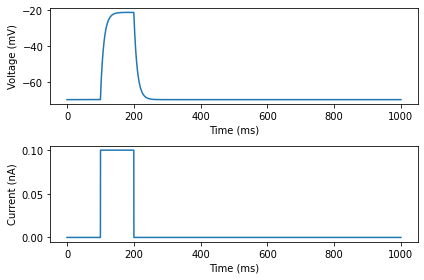

Ellipsis

In [ ]:
fig4, ax4 = plt.subplots(2,1)


ax4[0].plot(t, V)
ax4[0].set_xlabel('Time (ms)')
ax4[0].set_ylabel('Voltage (mV)')

# plot square current pulse
I = np.zeros(k+1)
I[int(I_start/dt):int(I_stop/dt)] = I_e
ax4[1].plot(t, I)
ax4[1].set_xlabel('Time (ms)')
ax4[1].set_ylabel('Current (nA)')

plt.tight_layout()
plt.show()

...


##Q2.7
From the previous plot estimate the time constant of the cell (Recall that as the voltage changes from $V_0$ to steady state, only $1/e$ of the total voltage change is left at time $t = \tau_m$  ).

In [ ]:
# add your code (if any)  here
t_max = 20000
delta_V = V[t_max] - V[0]
# print(delta_V)
e = np.exp(1)
# find the time when the value is withing (1/e)*delta_V of the new equilibrium
for i in range(t_max):
  if V[t_max]-V[i]<(1/e)*delta_V:
    break
print(f'time constant estimate:{(i-10000)/1000} ms')

time constant estimate:9.999 ms


By inspecting the plot, estimate the time constant (enter it here): The time constant is 9.999 ms


...




##Q2.8
How does the value obtained in question 7 compares to the value obtained in question 4?


Answer: The values 9.999 ms and 10 ms are essentially the same. 

...


##Q2.9
Show analytically (manipulate the equations, no Python simulations) that
equation 2.2 is indeed a solution to the RC differential equation 2.1.


Show main steps here (using Latex):

Equation 2.2:
$$V(t) = V_{rest} + R_m I_e + (V_0 - V_{rest} - R_m I_e) e^{-\frac{t-t_0}{\tau_m}}$$

Taking the first derivative of V(t) with respect to t:

$$\frac{dV(t)}{dt} = \frac{d}{dt} \left[ V_{rest} + R_m I_e + (V_0 - V_{rest} - R_m I_e) e^{-\frac{t-t_0}{\tau_m}} \right]$$

$$\frac{dV(t)}{dt} = -\frac{1}{\tau_m} (V_0 - V_{rest} - R_m I_e) e^{-\frac{t-t_0}{\tau_m}}$$

Substitute V(t) and dV(t)/dt

Equation 2.1:

$$V(t) + \tau_m \frac{dV(t)}{dt} = V_{rest} + R_m I_e$$

$$\left[ V_{rest} + R_m I_e + (V_0 - V_{rest} - R_m I_e) e^{-\frac{t-t_0}{\tau_m}} \right] + \tau_m \left[ -\frac{1}{\tau_m} (V_0 - V_{rest} - R_m I_e) e^{-\frac{t-t_0}{\tau_m}} \right] = V_{rest} + R_m I_e$$

$$V_{rest} + R_m I_e + (V_0 - V_{rest} - R_m I_e) e^{-\frac{t-t_0}{\tau_m}} - (V_0 - V_{rest} - R_m I_e) e^{-\frac{t-t_0}{\tau_m}} = V_{rest} + R_m I_e$$

After simplifying, we see that deriving the second equation and plugging in the values for $\frac{dV(t)}{dt}$ and $V(t)$ yields that equation 2.2 is a solution to 2.1.


##Q2.10
Show analytically that equation 2.2 satisfies $V(t_0) = V_0$.



Answer:

Substituting t = t0 and simplify:

$$V(t_0) = V_{rest} + R_m I_e + (V_0 - V_{rest} - R_m I_e) e^{-(t_0-t_0)/\tau_m}$$

$$V(t_0) = V_{rest} + R_m I_e + (V_0 - V_{rest} - R_m I_e) e^{0}$$

$$V(t_0) = V_{rest} + R_m I_e + (V_0 - V_{rest} - R_m I_e) (1)$$

$$V(t_0) = V_{rest} + R_m I_e + V_0 - V_{rest} - R_m I_e$$

$$V(t_0) = V_0$$

Equation 2.2 satisfies V(t0) = V0.

...


##Q2.11
Show analytically that for equation 2.2, as $ t \rightarrow \infty$
\begin{equation}
V(t) \rightarrow V_{rest} + R_m I_e = V_{\infty}
\end{equation}
also
known as the steady state of the system.



Take the limit as t goes to infinity in equation 2.2 and simplify (the e value becomes 0):

$$\lim_{t\rightarrow\infty}V(t) = \lim_{t\rightarrow\infty}V_{rest} + R_mI_e + (V_0 - V_{rest} - R_mI_e)e^{-(t-t_0)/\tau_m}$$


$$\lim_{t\rightarrow\infty}V(t) = V_{rest} + R_mI_e + (V_0 - V_{rest} - R_mI_e)(0)$$

$$\lim_{t\rightarrow\infty}V(t) = V_{rest} + R_mI_e$$



##Q2.12
Suppose the cell is at $V_{rest}$ at $t = 0$, when a current step of $I_e = 500 pA$ is turned on.
How long will it take for the cell to reach $-60 mV$? What is the steady state voltage
for this value of $I_e$? Compute these answers analytically. 23.25ms



In [ ]:
Ie = 0.5 # in nA

# how long to -60 mV? 60= 23.25 ms
# enter your answer for t60 here
t60 = -tau * np.log((-60 - Vrest - Rm * Ie) / (-Rm * Ie))

# calculate steady-state voltage for Ie=0.5 nA
# V_inf = Vrest + Rm * Ie

# print results
print("It takes %.2f milliseconds to reach -60 mV" % (t60))


It takes 23.52 milliseconds to reach -60 mV


In [ ]:
# Steady state in this case, V_ss 

# enter your code/answer for V-ss here
V_ss = Vrest + Rm * Ie


print('is %.2f mV' %V_ss)

is -58.95 mV


##Q2.13
Let’s add an extra channel to our neuron. The extra channel has a resistance $R_{extra}$
and is added in parallel to the other components. Does this new channel make
the membrane time constant slower or faster? Show calculations to support your
conclusion.

Answer: Adding an extra channel to our neuron makes the time constant faster.

Show main steps using latex.
This is because we add a hole to the membrane and create a new resistance:

$$R_{new} = 1/((1/R_{m})+(1/R_{extra}))$$ 

When we do this, the tau changes from $R_{m}C_{m}$ to $R_{new}C_{m}$ and $R_{new}$ is greater than $R_{m}$. This means that the old tau is greater than the new tau so the time constant is smaller and also faster.


...

# **PROBLEM 3: Nernst Potential**

---



Ions will drift across the membrane down their concentration gradient from areas of high
concentration to areas of low concentration. However, this creates a charge gradient in
the opposite direction, since ions are charged. These two opposing forces balance at the
Nernst potential where the net flow across the membrane for a given ion species is zero.
The Nernst potential is given by the following formula:
\begin{equation}
E = \frac{kT}{q} \log \left( \frac{C_e}{C_i} \right)
\end{equation}
where $k$ is the Boltzmann constant with value $1.38 \times 10^{-23} (J/K)$, $T$ is the temperature in
Kelvins $(T(K) = T(C) + 273.15)$, and $q$ is the charge of a monovalent ion with value $1.6 \times 10^{-
19} (C)$.

For this problem let’s consider a neuron with the following intra- and extra-cellular ionic
concentrations: $[K^+]_{in} = 186 mM, [K^+]_{out} = 4.8 mM, [Ca^{++}]_{in} = 50 nM, [Ca^{++}]_{out} = 1.5 mM$.


##Q3.1
Complete the starter code provided below so that it calculates the Nernst potential in mV for ions of any arbitrary valence at a specified temperature in degrees Celsius.


In [ ]:
# deleter previous variables from memory
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np

# function to calculate the Nernst potential
def nernst_potential(c_in, c_out, z, T):
    # computes nernst potential at specified temp in celsius
    #
    # Inputs:
    # c_in: internal ionic concentration
    # c_out: external "
    # z: ion valence (with sign)
    # T: temperature in degrees Celsius
    #
    # Output:
    # E: nernst potential in mV
    #
    #
    # NB: c_in and c_out need to be same units
    T_kel = 273.15 + T
    k = 1.38e-23
    q = z * 1.6e-19
    
    # add your code for Nernst potential E:

    E = (k*T_kel/q) * np.log(c_out/c_in) *1000 
    
    return E

##Q3.2
Calculate the Nernst potentials of $K^+$ and of $Ca^{++}$ for this cell at $37{}^oC$, using the function you wrote in question 1.

In [ ]:
import numpy as np

# function to calculate the Nernst potential

# define the concentrations and valences
K_in = 186   # mM
K_out = 4.8  # mM
Ca_in = 50 * 1e-6   # mM (converted from nM)
Ca_out = 1.5   # mM
z_K = 1
z_Ca = 2

# calculate the Nernst potentials for K+ and Ca++
T = 37
E_K = nernst_potential(K_in, K_out, z_K, T)
E_Ca = nernst_potential(Ca_in, Ca_out, z_Ca, T)

print("Nernst potential of K+ = {:.2f} mV".format(E_K))
print("Nernst potential of Ca++ = {:.2f} mV".format(E_Ca))

Nernst potential of K+ = -97.83 mV
Nernst potential of Ca++ = 137.88 mV


#**PROBLEM 4: Ionic Fluxes and Nernst Potential**

A spherical cell of radius $0.06 mm$ cell with a specific membrane capacitance of $10 nF/mm^2$ is sitting in a bath at $37{}^oC$. The only channel present in this cell is a Potassium conductance and the concentration of this is: $186 mM$ intracellularly Potassium and $4.8 mM$ extracellularly. (Note that these numbers are the same as in problem 2 and 3).
This cell starts at $0 mV$ with all the potassium channels closed. At time $t_0$ the channels are suddenly opened.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


##Q4.1
Calculate the initial (before the channels open) number of potassium ions inside the cell.

In [ ]:
import numpy as np

r = 0.06 # in mm
K_in = 186e-3 #M
K_out = 4.8e-3 #M
C = 0.45 #nF, taken from problem 2

# cell volume
Vol = (4/3)*np.pi*(r**3) #in mm3


# add your code here:
# First, find moles inside cell, moles:
moles = (Vol * K_in) / 1000000


initial_ions = moles * 6.0221e23


print("There are %.2e potassium ions inside the cell" %initial_ions)

There are 1.01e+14 potassium ions inside the cell


##Q4.2
What is the steady state membrane potential a long time after the channels open?

In [ ]:
# From Q3.2, the Potassium Nernst potential is the steady 
# state membrane potential (mV):


Vss = nernst_potential(K_in, K_out, 1, 37)

print(f'Vss: {Vss} mv')

Vss: -97.82984771233843 mv


##Q4.3
Calculate how much net charge must accumulate for the cell to reach steady state. Remember that the charge accumulated by a capacitor is $q=CV$.

In [ ]:
q = C * Vss 
q = q * 10e-9 * 10e-5 
print("At steady state, we accumulate %.2e C of charge." %q)


At steady state, we accumulate -4.40e-11 C of charge.


##Q4.4
Calculate the net change in number of potassium ions. In which direction is this net flux?

In [ ]:
e = 1.602 * 10e-20
n_ions = abs(q/e)
print("The net change is %.2e potassium ions." %n_ions)



The net change is 2.75e+08 potassium ions.


Answer: The net change in the number of potassium ions is 2.75e^8

direction of flux : Out of cell



##Q4.5
How much does this flux of $K^+$ ions change the cell’s potassium concentration? Would this change affect the physiological properties of the neuron?

Hint: 1 liter = $10^{-3} m^3$

In [ ]:
# add your code here

new_moles = (initial_ions - n_ions) / (6.022 * 10e23)

new_K_in = new_moles * 10e6 / Vol 

print(f'old concentration:{K_in} M, new concentration:{new_K_in} M')


old concentration:0.186 M, new concentration:0.18600258431760905 M


Answer:
The concentration does not change.

The physiological properties: Since the concentration does not change, the physiological properties of the neuron will be in a state of equlibrium and will also not change